In [ ]:
import pandas as pd
df=pd.read_csv('/content/Sales_add.csv')
print(df)

       Month      Region      Manager  Sales_before_digital_add(in $)  \
0    Month-1  Region - A  Manager - A                          132921   
1    Month-2  Region - A  Manager - C                          149559   
2    Month-3  Region - B  Manager - A                          146278   
3    Month-4  Region - B  Manager - B                          152167   
4    Month-5  Region - C  Manager - B                          159525   
5    Month-6  Region - A  Manager - B                          137163   
6    Month-7  Region - C  Manager - C                          130625   
7    Month-8  Region - A  Manager - A                          131140   
8    Month-9  Region - B  Manager - C                          171259   
9   Month-10  Region - C  Manager - B                          141956   
10  Month-11  Region - B  Manager - C                          159339   
11  Month-12  Region - A  Manager - A                          178939   
12  Month-13  Region - B  Manager - A              

In [ ]:
df=df.rename(columns={'Sales_before_digital_add(in $)':'Sales_before_digital','Sales_After_digital_add(in $)':'Sales_After_digital' })
print(df)

,Sales_before_digital,Sales_After_digital
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


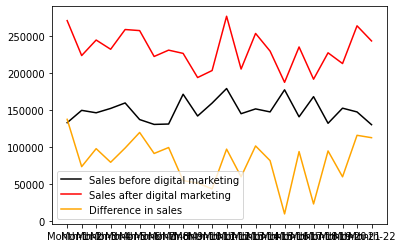

In [ ]:
#Graphical representation
import matplotlib.pyplot as plt
x=df['Month']
y1=df['Sales_before_digital']
y2=df['Sales_After_digital']
y3=df['Sales_After_digital']-df['Sales_before_digital']
plt.plot(x,y1,color='k',label='Sales before digital marketing')
plt.plot(x,y2,color='r',label='Sales after digital marketing')
plt.plot(x,y3,color='orange',label='Difference in sales')
plt.legend()
plt.show()

In [18]:
from statsmodels.stats.weightstats import ztest as ztest
y1=df['Sales_before_digital']
y2=df['Sales_After_digital']
t_val,p_val=stats.ttest_rel(y1,y2)
print('t-value is:',t_val)
print('p-value is:',p_val)



t-value is: -12.09070525287017
p-value is: 6.336667004575778e-11


As t-value is much greater than t-alpha which is 2.015 the null hypothesis is rejected
alternate hypothesis is accepted ie, there is an increase in sale after stepping into digital marketing

In [ ]:
df1=df.groupby(['Region','Manager'])['Sales_before_digital'].mean()
print(df1)

Region      Manager    
Region - A  Manager - A    148628.500000
            Manager - B    155617.000000
            Manager - C    140228.000000
Region - B  Manager - A    142725.000000
            Manager - B    152167.000000
            Manager - C    165299.000000
Region - C  Manager - A    147463.000000
            Manager - B    156492.333333
            Manager - C    130625.000000
Name: Sales_before_digital, dtype: float64


In [ ]:
df2=df.groupby(['Region','Manager'])['Sales_After_digital'].mean()
print(df2)

Region      Manager    
Region - A  Manager - A    257609.250000
            Manager - B    218944.000000
            Manager - C    233754.000000
Region - B  Manager - A    234962.750000
            Manager - B    231808.000000
            Manager - C    214718.000000
Region - C  Manager - A    229336.000000
            Manager - B    214551.333333
            Manager - C    222106.000000
Name: Sales_After_digital, dtype: float64


The above results shows that there is not much dependency between Region and Manager since irrespective of region, managers shows consistent performance ,before and after addition of digital marketing

In [ ]:
#To prove dependency between region and manager using chi square test
#H0: Region and Manager are independent
#H1: Region and Manager are not independent

In [20]:
crosstab=pd.crosstab(df['Region'],df['Manager'],normalize='index')
crosstab

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,0.400000,0.300000,0.300000
Region - B,0.571429,0.142857,0.285714
Region - C,0.200000,0.600000,0.200000


In [21]:
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(crosstab)
print('chi square statistic:',c)
print('pvalue:',p)
print('degrees of freedom:',dof)

chi square statistic: 0.5097129666190809
pvalue: 0.9725485584250712
degrees of freedom: 4


level of significance for .05 is 2.78 
chi square value is less than 2.78, so null hypothesis is accepted.
The Region and Manager are independent, ie no relation between Region and Manager for the sales